# Telecommunication Customer Churn

<img src="https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png" alt="Alt text that describes the graphic" title="Title text" />

# Content
1. <a href="#1.-Introduction" style="text-decoration: none;font-size:20px;font-family: 'Palatino Linotype', sans-serif;">Introduction</a>
<!--     * <a href="#Background" style="text-decoration: none;font-size:18px;font-family: 'Palatino Linotype', sans-serif;">Background</a>
    * <a href="#Purpose" style="text-decoration: none;font-size:18px;font-family: 'Palatino Linotype', sans-serif;">Purpose</a> -->
2. <a href="#2.-Data-Preparation" style="text-decoration: none;font-size:20px;font-family: 'Palatino Linotype', sans-serif;">Data Preparation</a>
3. <a href="#3.-Exploratory-Data-Analysis-(EDA)" style="text-decoration: none;font-size:20px;font-family: 'Palatino Linotype', sans-serif;">Exploratory Data Analysis (EDA)</a>
4. <a href="#4.-Data-Visualization" style="text-decoration: none;font-size:20px;font-family: 'Palatino Linotype', sans-serif;">Data Visualization</a>
5. <a href="#5.-ML-model-evaluations-and-predictions" style="text-decoration: none;font-size:20px;font-family: 'Palatino Linotype', sans-serif;">ML model evaluations and predictions</a>


# 1. Introduction

### Background

<div style="border: 1px solid black; padding: 10px; background-color: #f1f1f1;font-size:18px">
Customer churn, the phenomenon of customers leaving a company's services, is a critical concern for telecommunications companies. In this project, we aim to gain comprehensive insights into customer churn patterns within a telecom company.By understanding the factors influencing churn, we strive to develop effective strategies to retain customers and improve overall business performance.</div>

### Purpose

<div style="border: 1px solid black; padding: 10px; background-color: #f1f1f1;font-size:18px">
The purpose of this case study is to explore the Telco Customer Churn dataset and build a predictive model that can accurately identify customers who are likely to churn.</div>

In [46]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats
import skopt
import pickle
import warnings

warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns',None)


from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedStratifiedKFold,RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel, SelectFdr,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from skopt import BayesSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF



In [47]:
# loading data
df = pd.read_csv(filepath_or_buffer = "C:/Users/Edish/Documents/Python Taskilled/Project/telco-customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.shape

(7043, 21)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Preparation

In [50]:
# checking for any duplicate values
df.duplicated().sum()

0

<div class = 'alert alert-block alert-info'>
    <strong>customerID is non-informative column, therefore it should be removed</strong>
 </div>

In [51]:
df.drop(['customerID'],axis = 1,inplace = True)

In [52]:
# removing potential whitespaces
df.columns = df.columns.str.strip()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# replacing with NaN
df = df.replace(' ', np.nan)

In [54]:
# checking for datatype of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<div class="alert alert-block alert-warning">
<strong>
    
- 'MonthlyCharges' is in 'float64' datatype, while TotalCharges values are strings. So, we should convert it into 'float64'.
    
- 'SeniorCitizen' should be of type 'object'.
    </strong>
</div>


In [55]:
# converting 'TotalCharges' datatype from object to float64
df.TotalCharges = df.TotalCharges.astype('float64')

In [56]:
# replacing values of SeniorCitizen with strings
df.SeniorCitizen = df.SeniorCitizen.map({0:'No',1:'Yes'})

In [57]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [58]:
# checking for missing values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<div class="alert alert-block alert-danger">
    <strong>TotalCharges column has 11 missing values</strong></div>

In [59]:
# filtering rows with NaN values of 'TotalCharges'
df.loc[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [60]:
# filtering indexes where tenure is 0
df.loc[df.tenure == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

<div class="alert alert-block alert-info">
<strong>Rows with "MonthlyCharges" having some value, "TotalCharges" being NaN, and "tenure" being 0, this combination of data appears inconsistent.Therefore we should drop the values with tenure being 0.</strong></div>

In [61]:
# droping indexes where tenure is 0 (TotalCharges is NaN at the same time)
df.drop(df.loc[df.tenure == 0].index,axis = 0,inplace = True)

In [62]:
# checking for any missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
# creating data frame that consist of columns,their unique values and datatypes
output_data = []

for col in df.columns:
    if df.loc[:, col].nunique() <= 5:
        unique_values = df.loc[:, col].unique()
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,gender,2,"[Female, Male]",object
1,SeniorCitizen,2,"[No, Yes]",object
2,Partner,2,"[Yes, No]",object
3,Dependents,2,"[No, Yes]",object
4,tenure,72,-,int64
5,PhoneService,2,"[No, Yes]",object
6,MultipleLines,3,"[No phone service, No, Yes]",object
7,InternetService,3,"[DSL, Fiber optic, No]",object
8,OnlineSecurity,3,"[No, Yes, No internet service]",object
9,OnlineBackup,3,"[Yes, No, No internet service]",object


In [64]:
# showing unique values of each categorical column
for col in df:
    if df[col].dtypes == 'object':
        print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:['No' 'Yes']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


<div class="alert alert-block alert-info">
<strong>
    
- No internet service is kind of No
- No phone service is kind of No  
    
So we should replace both of them with No
</strong>
</div>


In [65]:
df.replace('No internet service','No',inplace = True)
df.replace('No phone service','No',inplace = True)

In [66]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Exploratory Data Analysis (EDA)

In [67]:
# descriptive statistics summary
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [68]:
df.drop(columns = 'Churn').corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


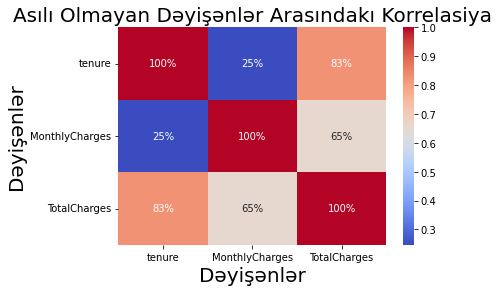

In [69]:
sns.heatmap(data = df.drop(columns = 'Churn').corr(), cmap = plt.cm.coolwarm, annot = True, fmt = '.0%')
plt.title(label = 'Asılı Olmayan Dəyişənlər Arasındakı Korrelasiya', fontsize = 20)
plt.xlabel(xlabel = 'Dəyişənlər', fontsize = 20)
plt.ylabel(ylabel = 'Dəyişənlər', fontsize = 20)
plt.yticks(rotation = 0)
plt.show()

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

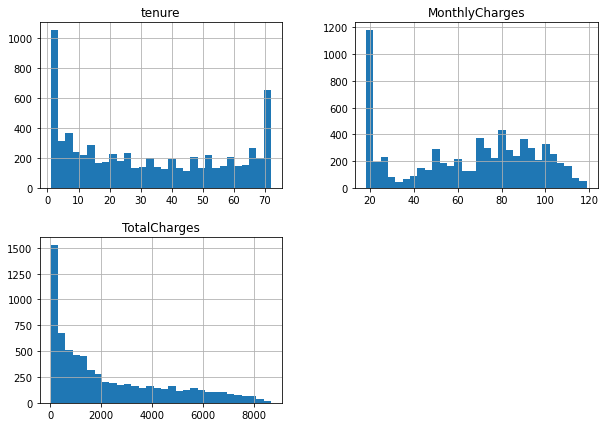

In [70]:
df.hist(bins = 30,figsize = (10,7))

In [71]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [72]:
# creating Pie chart using Plotly
fig = go.Figure()

fig.add_trace(go.Pie(labels = ['No','Yes'],values = df['Churn'].value_counts(),name = 'Churn',
                     marker=dict(colors=['gold','mediumturquoise'], line=dict(color='#000000', width=2))))

fig.update_traces(hoverinfo="label+percent", textfont_size=16)

# update the layout of the plot
fig.update_layout(
title = 'Churn Distribution')

# Show the plot
fig.show()


In [73]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [74]:
# creating Pie chart using Plotly
fig = go.Figure()

fig.add_trace(go.Pie(labels = ['Male','Female'],values = df['gender'].value_counts(),name = 'Gender',
                  marker=dict(colors=['lightblue','pink'],line = dict(color = '#000',width = 2))))

fig.update_traces(hoverinfo="label+percent", textfont_size=16)

# update the layout of the plot
fig.update_layout(
title = 'Gender and Churn Distribution')

# Show the plot
fig.show()



In [75]:
# Separating tenure data for Churn = Yes and Churn = No
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']
tenure_churn_no = df[df['Churn'] == 'No']['tenure']

# Create two histograms using Plotly
fig = go.Figure()

fig.add_trace(go.Histogram(x=tenure_churn_yes, name='Churn = Yes',marker_color = 'darkorange'))
fig.add_trace(go.Histogram(x=tenure_churn_no, name='Churn = No',marker_color = 'blue'))

# Update the layout of the plot
fig.update_layout(
    xaxis_title='Tenure',
    yaxis_title='Number of Customers',
    title='Churn by Tenure',
    barmode='group',
    bargap=0.4
)

# Show the plot
fig.show()


<div class = 'alert alert-block alert-info'><strong>Majority of the customers who are with the company for a long time are not leaving.</strong></div>

In [76]:
yes_no = {'Yes':1, 'No':0}
g = {'Male':1, 'Female':0}
in_s = {'No':1, 'Yes':2, 'No internet service':0}
s = {'No phone service':0, 'No':1, 'Yes':2}
net_s = {'DSL':2, 'Fiber optic':1, 'No':0}
cont = {'Month-to-month':0, 'One year':1, 'Two year':2}
paym = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
       'Credit card (automatic)':3}

In [77]:
df['gender'] = df['gender'].replace(g)

df['Partner'] = df['Partner'].replace(yes_no)
df['Dependents'] = df['Dependents'].replace(yes_no)
df['PhoneService'] = df['PhoneService'].replace(yes_no)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(yes_no)
df['Churn'] = df['Churn'].replace(yes_no)

df['MultipleLines'] = df['MultipleLines'].replace(s)

df['OnlineSecurity'] = df['OnlineSecurity'].replace(in_s)
df['OnlineBackup'] = df['OnlineBackup'].replace(in_s)
df['DeviceProtection'] = df['DeviceProtection'].replace(in_s)
df['TechSupport'] = df['TechSupport'].replace(in_s)
df['StreamingTV'] = df['StreamingTV'].replace(in_s)
df['StreamingMovies'] = df['StreamingMovies'].replace(in_s)

df['InternetService'] = df['InternetService'].replace(net_s)

df['Contract'] = df['Contract'].replace(cont)

df['PaymentMethod'] = df['PaymentMethod'].replace(paym)

In [78]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn               1.000000
Contract            0.396150
tenure              0.354049
PaymentMethod       0.262918
TotalCharges        0.199484
MonthlyCharges      0.192858
PaperlessBilling    0.191454
OnlineSecurity      0.171270
TechSupport         0.164716
Dependents          0.163128
Partner             0.149982
OnlineBackup        0.082307
DeviceProtection    0.066193
StreamingTV         0.063254
StreamingMovies     0.060860
InternetService     0.047097
MultipleLines       0.040033
PhoneService        0.011691
gender              0.008545
dtype: float64

In [79]:
df = df.drop(columns = ['gender','PhoneService','OnlineSecurity','TechSupport','MultipleLines','InternetService'])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,1,0,1,2,1,1,1,0,1,0,29.85,29.85,0
1,No,0,0,34,1,2,1,1,1,0,1,56.95,1889.50,0
2,No,0,0,2,2,1,1,1,0,1,1,53.85,108.15,1
3,No,0,0,45,1,2,1,1,1,0,2,42.30,1840.75,0
4,No,0,0,2,1,1,1,1,0,1,0,70.70,151.65,1


In [80]:
X = df.drop(columns = 'Churn')
Y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42) 

In [81]:
def create_pipeline(classifier = None,metric = None):
    
    feature_selector = SequentialFeatureSelector(estimator= classifier, scoring = metric,
                                                 cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), n_jobs=-1)
    
    # Define the transformers and selector
    categoric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                             ('ohe', OneHotEncoder(handle_unknown='ignore'))])

    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                           ('scaler', MinMaxScaler())])

    categoric_features = make_column_selector(dtype_include='object')
    numeric_features = make_column_selector(dtype_include='number')
    
    if classifier == 'LogisticRegression':
        classifier = LogisticRegression(random_state = 42)
    elif classifier == 'DecisionTree':
        classifier = DecisionTree()
    elif classifier == 'RandomForestClassifier':
        classifier = RandomForestClassifier()
    elif classifier == 'GradientBoosting':
        classifier = GradientBoostingClassifier()
    

    transformer = ColumnTransformer(transformers=[('categoric_transformer', categoric_transformer, categoric_features),
                                                  ('numeric_transformer', numeric_transformer, numeric_features)])


    # Create the pipeline
    pipe = Pipeline(steps=[('transformer', transformer), ('feature_selector', feature_selector), ('classifier', classifier)])

    return pipe


In [82]:
lg_pipeline = create_pipeline(classifier = 'LogisticRegression',metric = 'accuracy')
lg_pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categoric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025F2A56A6D0>),
                                                 ('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImp...tegy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025F2A56AB80>)])),
                ('feature_selector',
                 SequentialFeatureSelector(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
                                           estimator='LogisticRegression',
                                           n_jobs=-1, scoring='accuracy')),
                ('classifier', LogisticRegression(random_state=42))])

In [83]:
hyperparameters = {}
hyperparameters['feature_transformer__numeric_transformer__scaler'] = skopt.space.Categorical(categories = [RobustScaler(), MinMaxScaler(), MaxAbsScaler(), StandardScaler()])
hyperparameters['feature_transformer__numeric_transformer__imputer__strategy'] = skopt.space.Categorical(categories = ['mean', 'median', 'constant', 'most_frequent'])
hyperparameters['feature_selector'] = skopt.space.Categorical(categories = [SelectFromModel(estimator = lg_pipeline), SelectFdr()])
hyperparameters['classifier__C'] = skopt.space.Real(low = 1e-6, high = 100)
hyperparameters['classifier__tol'] = skopt.space.Real(low = 1e-6, high = 100)

bayes_search = BayesSearchCV(estimator = lg_pipeline,search_spaces = hyperparameters,n_iter = 100,scoring = 'accuracy',n_jobs = -1,
                            cv = RepeatedKFold(random_state = 42),random_state = 42)

bayes_search.fit(X=X_train,y=y_train)

pipe = bayes_search.best_estimator_
pipe

ValueError: Invalid parameter 'feature_transformer' for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categoric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D50D77DCA0>),
                                                 ('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D50D79EC70>)])),
                ('feature_selector', SelectFdr()),
                ('classifier', LogisticRegression(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
df.drop(columns = 'Churn').corr()

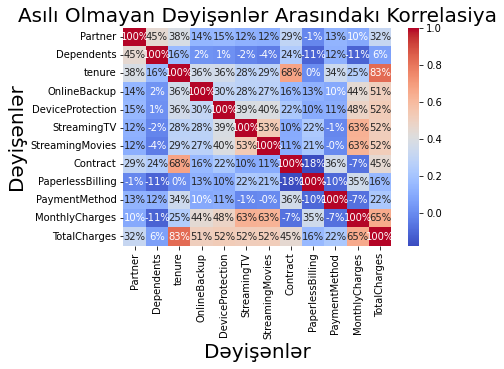

In [84]:
sns.heatmap(data = df.drop(columns = 'Churn').corr(), cmap = plt.cm.coolwarm, annot = True, fmt = '.0%')
plt.title(label = 'Asılı Olmayan Dəyişənlər Arasındakı Korrelasiya', fontsize = 20)
plt.xlabel(xlabel = 'Dəyişənlər', fontsize = 20)
plt.ylabel(ylabel = 'Dəyişənlər', fontsize = 20)
plt.yticks(rotation = 0)
plt.show()

# 5. ML model evaluations and predictions